# Preprocessing

In [11]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [12]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
# import custom packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [14]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)

In [15]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [16]:
# clean data
print(Hitters.shape)
Hitters = Hitters.dropna()

(322, 21)


In [17]:
Hitters.shape

(263, 21)

In [18]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [19]:
# converting categorical data into dummy variable
Hitters_1 = pd.get_dummies(Hitters, drop_first=True, columns=['League', 'Division', 'NewLeague'])

In [20]:
Hitters_1.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,475.0,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,480.0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,500.0,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,91.5,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,750.0,0,1,0


## Forward Stepwise Selection

In [84]:
lmf = LinearRegression()

In [116]:
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary

In [118]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [86]:
sfs = SFS(lmf, k_features=(1,len(X.columns)), forward=True, floating=False, scoring='r2',cv=10)

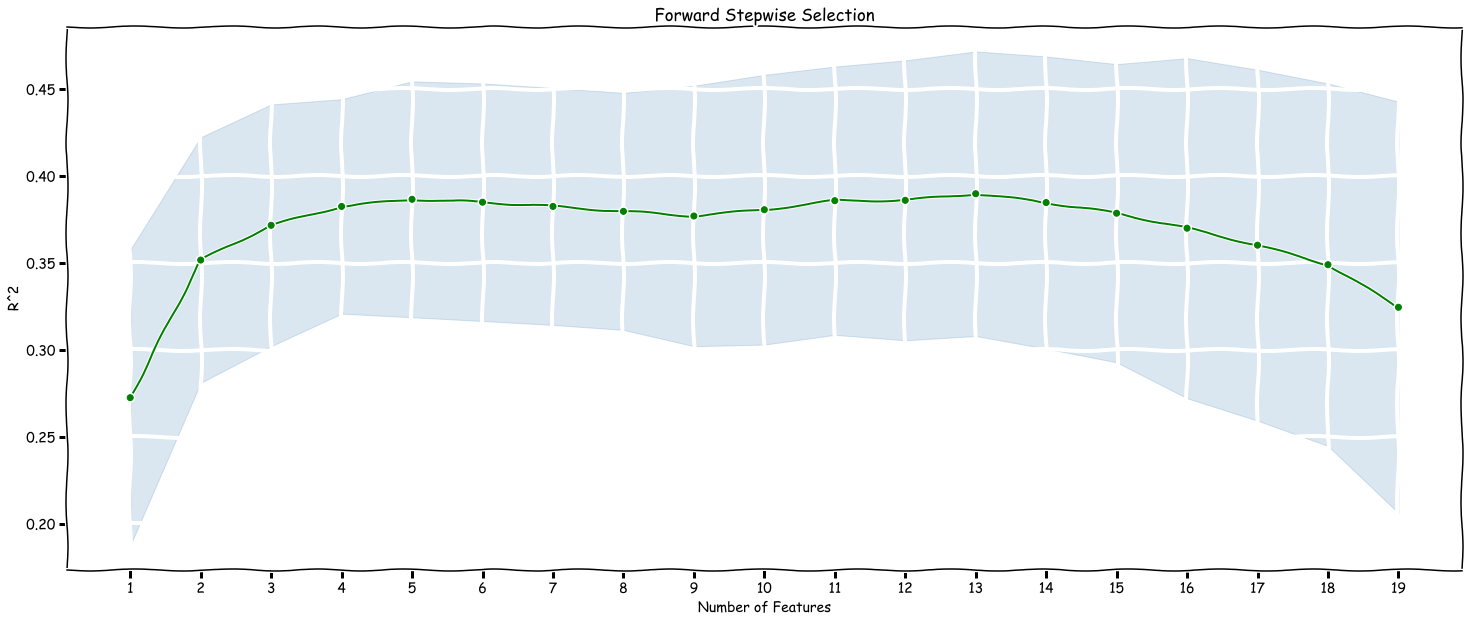

In [179]:
plt.xkcd()
sfs = sfs.fit(X.values, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', color='green')
plt.title('Forward Stepwise Selection')
plt.ylabel('R^2')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(25, 10)

**Forward stepwise selection achieves the highest $R^2$ for n=13. This means that the best regression equation will contain 13 features when employing forward stepwise selection.**

In [125]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [127]:
feat = sfs.k_feature_idx_
feat

(0, 1, 2, 4, 5, 7, 9, 10, 11, 13, 16, 17, 18)

In [168]:
feat_list = pd.DataFrame()
for i in feat:
    print(X.columns[i])
    feat_list = feat_list.append(pd.DataFrame([X.columns[i]]))
feat_list.reset_index(inplace=True, drop=True)
feat_list.columns = ['Features']
feat_list

AtBat
Hits
HmRun
RBI
Walks
CAtBat
CHmRun
CRuns
CRBI
PutOuts
League_N
Division_W
NewLeague_N


,Features
0,AtBat
1,Hits
2,HmRun
3,RBI
4,Walks
5,CAtBat
6,CHmRun
7,CRuns
8,CRBI
9,PutOuts


In [171]:
X_reg = X[feat_list['Features']]
X_reg.head()

,AtBat,Hits,HmRun,RBI,Walks,CAtBat,CHmRun,CRuns,CRBI,PutOuts,League_N,Division_W,NewLeague_N
1,315,81,7,38,39,3449,69,321,414,632,1,1,1
2,479,130,18,72,76,1624,63,224,266,880,0,1,0
3,496,141,20,78,37,5628,225,828,838,200,1,0,1
4,321,87,10,42,30,396,12,48,46,805,1,0,1
5,594,169,4,51,35,4408,19,501,336,282,0,1,0


In [172]:
lm_best = LinearRegression().fit(X_reg, y)

In [174]:
final_coefs = pd.DataFrame(lm_best.coef_)
final_coefs = pd.concat([feat_list['Features'], final_coefs], axis = 1)
final_intercept = pd.DataFrame([lm_best.intercept_]*13)
final_coefs = pd.concat([final_coefs, final_intercept], axis = 1)
final_coefs.columns = ['Features', 'Coefficients', 'Intercept']
final_coefs

,Features,Coefficients,Intercept
0,AtBat,-1.565413,92.653259
1,Hits,6.831929,92.653259
2,HmRun,0.132142,92.653259
3,RBI,-0.226508,92.653259
4,Walks,2.622761,92.653259
5,CAtBat,-0.162907,92.653259
6,CHmRun,-0.877268,92.653259
7,CRuns,0.992862,92.653259
8,CRBI,1.009177,92.653259
9,PutOuts,0.264327,92.653259


**Therefore the best regression line for Hitters using Forward Selection will be: Salary = 92.653259 -1.565413*AtBat +  6.831929*Hits + 0.132142*HmRun -0.226508*RBI + 2.622761*Walks -0.162907*CAtBat -0.877268*CHmRun + 0.992862*CRuns + 1.009177*CRBI + 0.264327*PutOuts +  56.899972*League(=N) -109.864179*Division(=W) -11.548970*NewLeague(=N).**

### Backward Stepwise Selection

In [180]:
lmb = LinearRegression()

In [181]:
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary

In [182]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [183]:
sfs = SFS(lmf, k_features=(1,len(X.columns)), forward=False, floating=False, scoring='r2',cv=10)

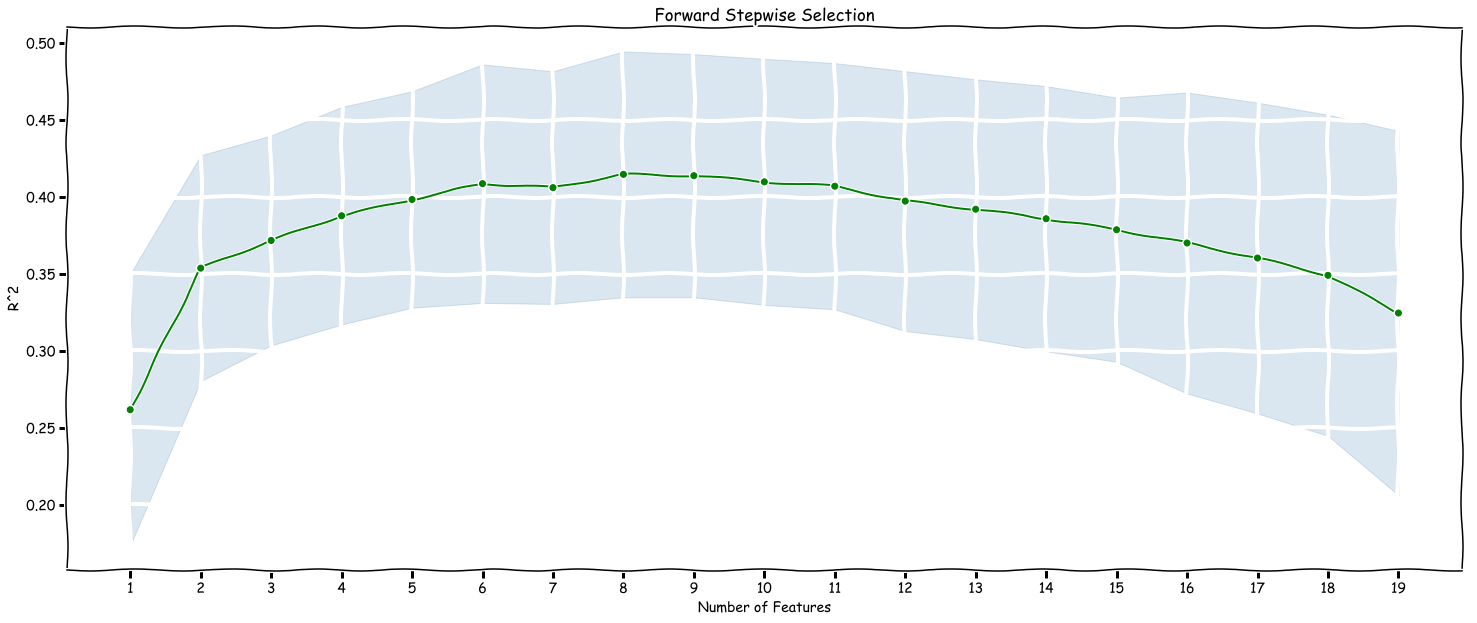

In [184]:
plt.xkcd()
sfs = sfs.fit(X.values, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', color='green')
plt.title('Forward Stepwise Selection')
plt.ylabel('R^2')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(25, 10)

**Backward stepwise selection achieves the highest $𝑅^2$ for n=8. This means that the best regression equation will contain 8 features when employing backward stepwise selection.**

In [125]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [185]:
feat = sfs.k_feature_idx_[:8]
feat

(0, 1, 5, 7, 10, 11, 13, 17)

In [186]:
feat_list = pd.DataFrame()
for i in feat:
    print(X.columns[i])
    feat_list = feat_list.append(pd.DataFrame([X.columns[i]]))
feat_list.reset_index(inplace=True, drop=True)
feat_list.columns = ['Features']
feat_list

AtBat
Hits
Walks
CAtBat
CRuns
CRBI
PutOuts
Division_W


,Features
0,AtBat
1,Hits
2,Walks
3,CAtBat
4,CRuns
5,CRBI
6,PutOuts
7,Division_W


In [187]:
X_reg = X[feat_list['Features']]
X_reg.head()

,AtBat,Hits,Walks,CAtBat,CRuns,CRBI,PutOuts,Division_W
1,315,81,39,3449,321,414,632,1
2,479,130,76,1624,224,266,880,1
3,496,141,37,5628,828,838,200,0
4,321,87,30,396,48,46,805,0
5,594,169,35,4408,501,336,282,1


In [188]:
lm_best = LinearRegression().fit(X_reg, y)

In [190]:
final_coefs = pd.DataFrame(lm_best.coef_)
final_coefs = pd.concat([feat_list['Features'], final_coefs], axis = 1)
final_intercept = pd.DataFrame([lm_best.intercept_]*8)
final_coefs = pd.concat([final_coefs, final_intercept], axis = 1)
final_coefs.columns = ['Features', 'Coefficients', 'Intercept']
final_coefs

,Features,Coefficients,Intercept
0,AtBat,-1.749469,118.235253
1,Hits,7.268237,118.235253
2,Walks,2.709401,118.235253
3,CAtBat,-0.108637,118.235253
4,CRuns,0.810856,118.235253
5,CRBI,0.606283,118.235253
6,PutOuts,0.277954,118.235253
7,Division_W,-111.070298,118.235253


**Therefore the best regression line for Hitters using Forward Selection will be: Salary = 118.235253 -1.749469*AtBat + 7.268237*Hits + 2.709401*Walks -0.108637*CAtBat +  0.810856*CRuns + 0.606283*CRBI + 0.277954*PutOuts -111.070298*Division(=W).**